In [1]:
from tree import Mbtree

def create_tree_by_bf(self):
    # 深さ 0 のノードを、子ノードを作成するノードのリストに登録する
    nodelist = [self.root]
    depth = 0
    # 各深さのノードのリストを記録する変数を初期化する
    self.nodelist_by_depth = [ nodelist ]
    
    # 子ノードを作成するノードのリストが空になるまで繰り返し処理を行う
    while len(nodelist) > 0:
        childnodelist = [] 
        for node in nodelist:
            node.calc_children()
            childnodelist += node.children
        self.nodelist_by_depth.append(childnodelist)
        nodelist = childnodelist
        depth += 1
        print(f"{len(nodelist):>6} depth {depth} node created")
        
    self.nodenum = 0
    for nodelist in self.nodelist_by_depth:
        self.nodenum += len(nodelist)
    print(f"total node num = {self.nodenum}")

Mbtree.create_tree_by_bf = create_tree_by_bf

In [2]:
mbtree = Mbtree()

     9 depth 1 node created
    72 depth 2 node created
   504 depth 3 node created
  3024 depth 4 node created
 15120 depth 5 node created
 60480 depth 6 node created
181440 depth 7 node created
362880 depth 8 node created
362880 depth 9 node created
     0 depth 10 node created
total node num = 986410


In [3]:
from marubatsu import Marubatsu

def create_tree_by_bf(self):
    # 深さ 0 のノードを、子ノードを作成するノードのリストに登録する
    nodelist = [self.root]
    depth = 0
    # 各深さのノードのリストを記録する変数を初期化する
    self.nodelist_by_depth = [ nodelist ]
    
    # 深さ depth のノードのリストが空になるまで繰り返し処理を行う
    while len(nodelist) > 0:
        childnodelist = [] 
        for node in nodelist:
            if node.mb.status == Marubatsu.PLAYING:
                node.calc_children()
                childnodelist += node.children
        self.nodelist_by_depth.append(childnodelist)
        nodelist = childnodelist
        depth += 1
        print(f"{len(nodelist):>6} depth {depth} node created")
        
    self.nodenum = 0
    for nodelist in self.nodelist_by_depth:
        self.nodenum += len(nodelist)
    print(f"total node num = {self.nodenum}")

Mbtree.create_tree_by_bf = create_tree_by_bf

In [4]:
mbtree = Mbtree()

     9 depth 1 node created
    72 depth 2 node created
   504 depth 3 node created
  3024 depth 4 node created
 15120 depth 5 node created
 54720 depth 6 node created
148176 depth 7 node created
200448 depth 8 node created
127872 depth 9 node created
     0 depth 10 node created
total node num = 549946


In [5]:
def calc_node_height(self, maxdepth):
    for depth in range(maxdepth, -1, -1):
        for node in self.nodelist_by_depth[depth]:
            if depth == maxdepth:
                node.height = 4
            else:
                node.calc_height()

Mbtree.calc_node_height = calc_node_height

In [6]:
mbtree.calc_node_height(maxdepth=2)
for depth in range(3):
    for node in mbtree.nodelist_by_depth[depth]:
        print(f"depth {depth} height {node.height}")

depth 0 height 288
depth 1 height 32
depth 1 height 32
depth 1 height 32
depth 1 height 32
depth 1 height 32
depth 1 height 32
depth 1 height 32
depth 1 height 32
depth 1 height 32
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
depth 2 height 4
dep

In [7]:
mbtree.calc_node_height(maxdepth=9)
print(mbtree.root.height)

1020672


In [8]:
import matplotlib.pyplot as plt

def draw_tree(self, size=0.25, lw=0.8, maxdepth=2):
    self.calc_node_height(maxdepth)
    width = 5 * (maxdepth + 1)
    height = self.root.height
    fig, ax = plt.subplots(figsize=(width * size, height * size))
    ax.set_xlim(0, width)
    ax.set_ylim(0, height)   
    ax.invert_yaxis()
    ax.axis("off")        
    
    for depth in range(maxdepth):
        dy = 0
        for node in self.nodelist_by_depth[depth]:
            node.draw_node(ax=ax, size=size, lw=lw, dx=depth*5, dy=dy)
            dy += node.height
        
Mbtree.draw_tree = draw_tree

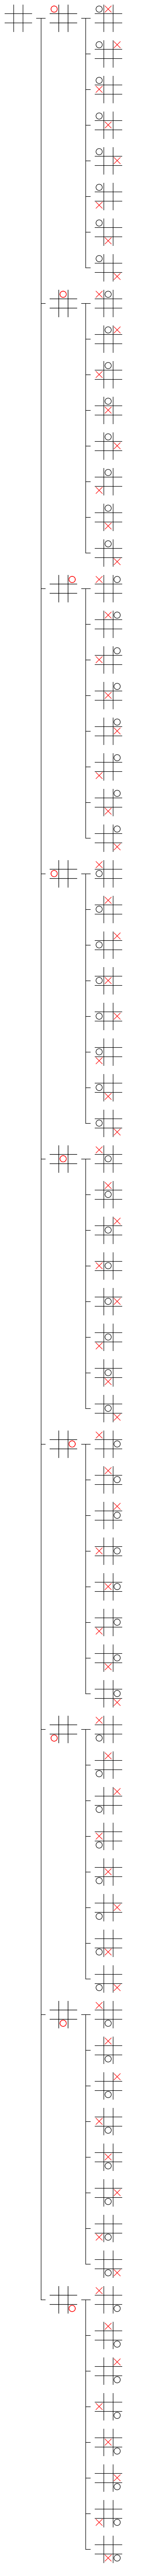

In [9]:
mbtree.draw_tree(maxdepth=2)

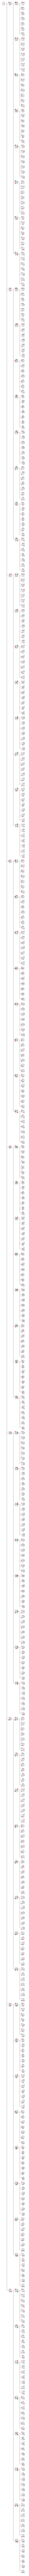

In [10]:
mbtree.draw_tree(size=0.1, lw=0.4, maxdepth=3)

In [11]:
mbtree.draw_tree(size=0.1, lw=0.4, maxdepth=4)

Error in callback <function _draw_all_if_interactive at 0x00000111E49C3100> (for post_execute):


ValueError: Image size of 250x120960 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 250x120960 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 250x120960 with 1 Axes>

In [12]:
def draw_tree(self, startnode=None, size=0.25, lw=0.8, maxdepth=2):
    if startnode is None:
        startnode = self.root
    self.calc_node_height(maxdepth)
    width = 5 * (maxdepth + 1)
    height = self.root.height
    fig, ax = plt.subplots(figsize=(width * size, height * size))
    ax.set_xlim(0, width)
    ax.set_ylim(0, height)   
    ax.invert_yaxis()
    ax.axis("off")        
    
    for depth in range(maxdepth):
        dy = 0
        for node in self.nodelist_by_depth[depth]:
            node.draw_node(ax=ax, size=size, lw=lw, dx=depth*5, dy=dy)
            dy += node.height
        
Mbtree.draw_tree = draw_tree

In [13]:
from tree import Node

def __init__(self, mb, depth=0):       
    self.mb = mb
    self.depth = depth
    self.children = []

Node.__init__ = __init__

In [14]:
from copy import deepcopy

def calc_children(self):
    self.children = []
    for x, y in self.mb.calc_legal_moves():
        childmb = deepcopy(self.mb)
        childmb.move(x, y)
        self.insert(Node(childmb, self.depth + 1))

Node.calc_children = calc_children

In [15]:
mbtree = Mbtree()
print(mbtree.root.depth)
print(mbtree.nodelist_by_depth[9][0].depth)

     9 depth 1 node created
    72 depth 2 node created
   504 depth 3 node created
  3024 depth 4 node created
 15120 depth 5 node created
 54720 depth 6 node created
148176 depth 7 node created
200448 depth 8 node created
127872 depth 9 node created
     0 depth 10 node created
total node num = 549946
0
9


In [16]:
def draw_tree(self, startnode=None, size=0.25, lw=0.8, maxdepth=2):
    if startnode is None:
        startnode = self.root
    self.calc_node_height(maxdepth)
    width = 5 * (maxdepth - startnode.depth + 1)
    height = startnode.height
    fig, ax = plt.subplots(figsize=(width * size, height * size))
    ax.set_xlim(0, width)
    ax.set_ylim(0, height)   
    ax.invert_yaxis()
    ax.axis("off")        
    
    for depth in range(maxdepth):
        dy = 0
        for node in self.nodelist_by_depth[depth]:
            node.draw_node(ax=ax, size=size, lw=lw, dx=depth*5, dy=dy)
            dy += node.height
        
Mbtree.draw_tree = draw_tree

In [17]:
def draw_tree(self, startnode=None, size=0.25, lw=0.8, maxdepth=2):
    if startnode is None:
        startnode = self.root
    self.calc_node_height(maxdepth)
    width = 5 * (maxdepth - startnode.depth + 1)
    height = startnode.height
    fig, ax = plt.subplots(figsize=(width * size, height * size))
    ax.set_xlim(0, width)
    ax.set_ylim(0, height)   
    ax.invert_yaxis()
    ax.axis("off")        
    
    nodelist = [startnode]
    depth = startnode.depth
    dx = 0
    while len(nodelist) > 0 and depth < maxdepth:        
        dy = 0
        childnodelist = []
        for node in nodelist:
            node.draw_node(ax=ax, size=size, lw=lw, dx=dx, dy=dy)
            dy += node.height
            childnodelist += node.children
        dx += 5
        depth += 1
        nodelist = childnodelist
        
Mbtree.draw_tree = draw_tree

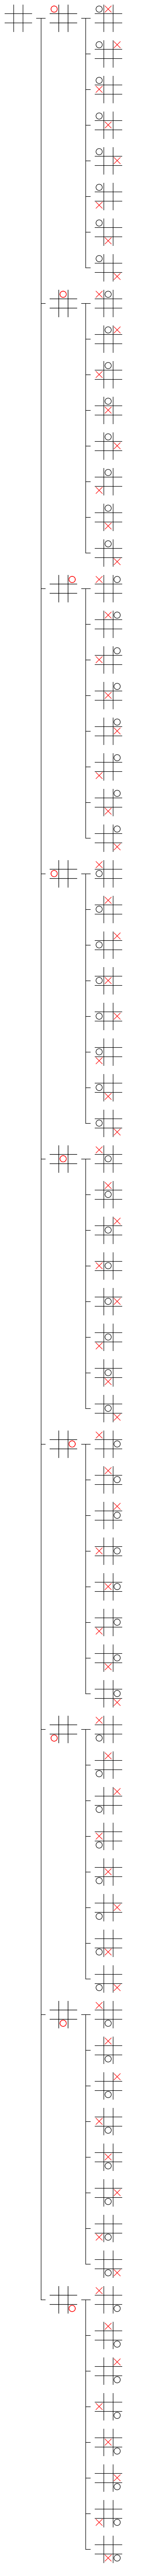

In [18]:
mbtree.draw_tree(maxdepth=2)

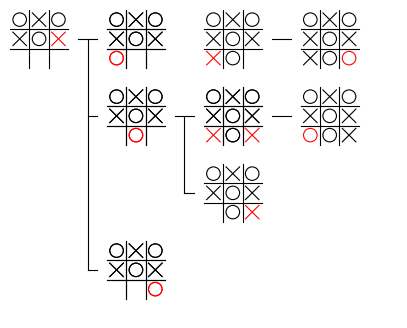

In [19]:
mbtree.draw_tree(mbtree.nodelist_by_depth[6][0], maxdepth=9)

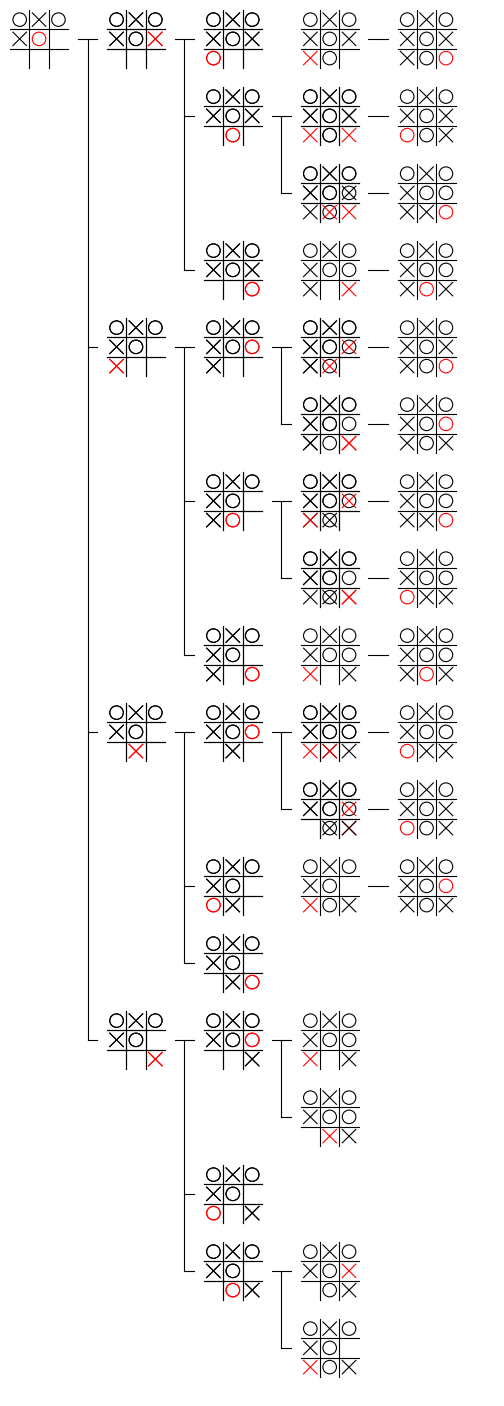

In [20]:
mbtree.draw_tree(mbtree.nodelist_by_depth[5][0], maxdepth=9)

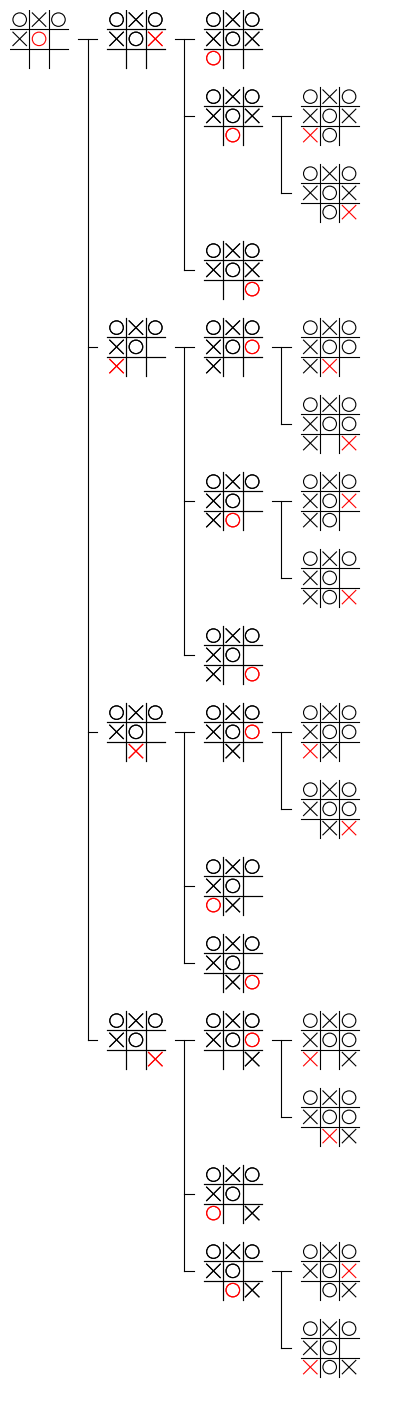

In [21]:
mbtree.draw_tree(mbtree.nodelist_by_depth[5][0], maxdepth=8)

In [22]:
from marubatsu import Marubatsu_GUI

def draw_node(self, ax, size=0.25, lw=0.8, dx=0, dy=0):
    width = 8
    if ax is None:
        height = len(self.children) * 4
        fig, ax = plt.subplots(figsize=(width * size, height * size))
        ax.set_xlim(0, width)
        ax.set_ylim(0, height)   
        ax.invert_yaxis()
        ax.axis("off")
        for childnode in self.children:
            childnode.height = 4
        if len(self.children) > 0:
            edgeheight = height - 4
    else:
        if len(self.children) > 0:
            edgeheight = self.height - self.children[-1].height
    
    # 自分自身のノードを (dx, dy) に描画する
    Marubatsu_GUI.draw_board(ax, self.mb, lw=lw, dx=dx, dy=dy)
    # 子ノードが存在する場合に、エッジの線と子ノードを描画する
    if len(self.children) > 0:   
        plt.plot([dx + 3.5, dx + 4, dx + 4], [dy + 1.5, dy + 1.5, dy + 1.5 + edgeheight], c="k", lw=lw)
        for childnode in self.children:
            plt.plot([dx + 4 , dx + 4.5], [dy + 1.5, dy + 1.5], c="k", lw=lw)
            dy += childnode.height
            
Node.draw_node = draw_node

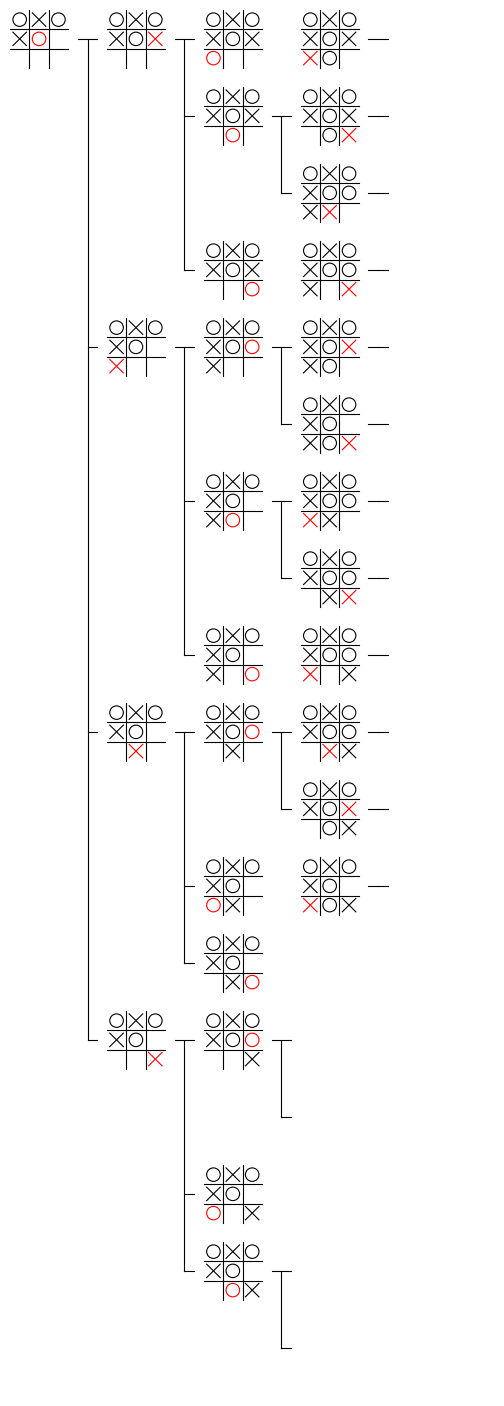

In [23]:
mbtree.draw_tree(mbtree.nodelist_by_depth[5][0], maxdepth=9)

In [24]:
def draw_tree(self, startnode=None, size=0.25, lw=0.8, maxdepth=2):
    if startnode is None:
        startnode = self.root
    self.calc_node_height(maxdepth)
    width = 5 * (maxdepth - startnode.depth + 1)
    height = startnode.height
    fig, ax = plt.subplots(figsize=(width * size, height * size))
    ax.set_xlim(0, width)
    ax.set_ylim(0, height)   
    ax.invert_yaxis()
    ax.axis("off")        
    
    nodelist = [startnode]
    depth = startnode.depth
    dx = 0
    while len(nodelist) > 0 and depth <= maxdepth:        
        dy = 0
        childnodelist = []
        for node in nodelist:
            node.draw_node(ax=ax, size=size, lw=lw, dx=dx, dy=dy)
            dy += node.height
            childnodelist += node.children
        dx += 5
        depth += 1
        nodelist = childnodelist
        
Mbtree.draw_tree = draw_tree

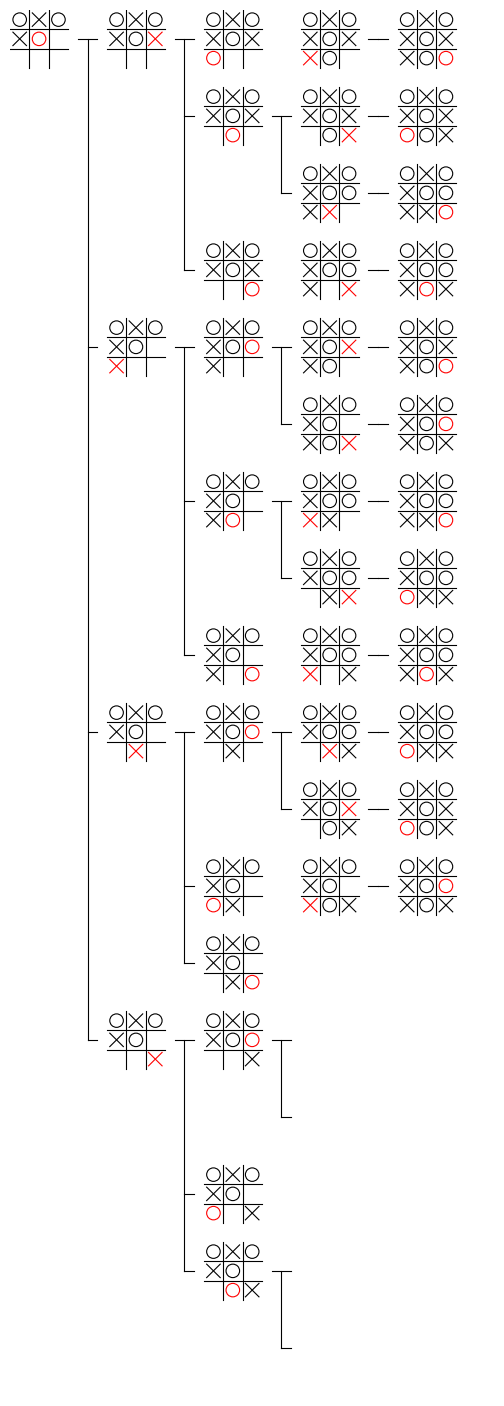

In [25]:
mbtree.draw_tree(mbtree.nodelist_by_depth[5][0], maxdepth=9)

In [26]:
def draw_tree(self, startnode=None, size=0.25, lw=0.8, maxdepth=2):
    if startnode is None:
        startnode = self.root
    self.calc_node_height(maxdepth)
    width = 5 * (maxdepth - startnode.depth + 1)
    height = startnode.height
    fig, ax = plt.subplots(figsize=(width * size, height * size))
    ax.set_xlim(0, width)
    ax.set_ylim(0, height)   
    ax.invert_yaxis()
    ax.axis("off")        
    
    nodelist = [startnode]
    depth = startnode.depth
    dx = 0
    while len(nodelist) > 0 and depth <= maxdepth:        
        dy = 0
        childnodelist = []
        for node in nodelist:
            if node is None:
                dy += 4
            else:
                node.draw_node(ax=ax, size=size, lw=lw, dx=dx, dy=dy)
                dy += node.height
                if len(node.children) > 0:  
                    childnodelist += node.children
                else:
                    childnodelist.append(None)
        dx += 5
        depth += 1
        nodelist = childnodelist
        
Mbtree.draw_tree = draw_tree

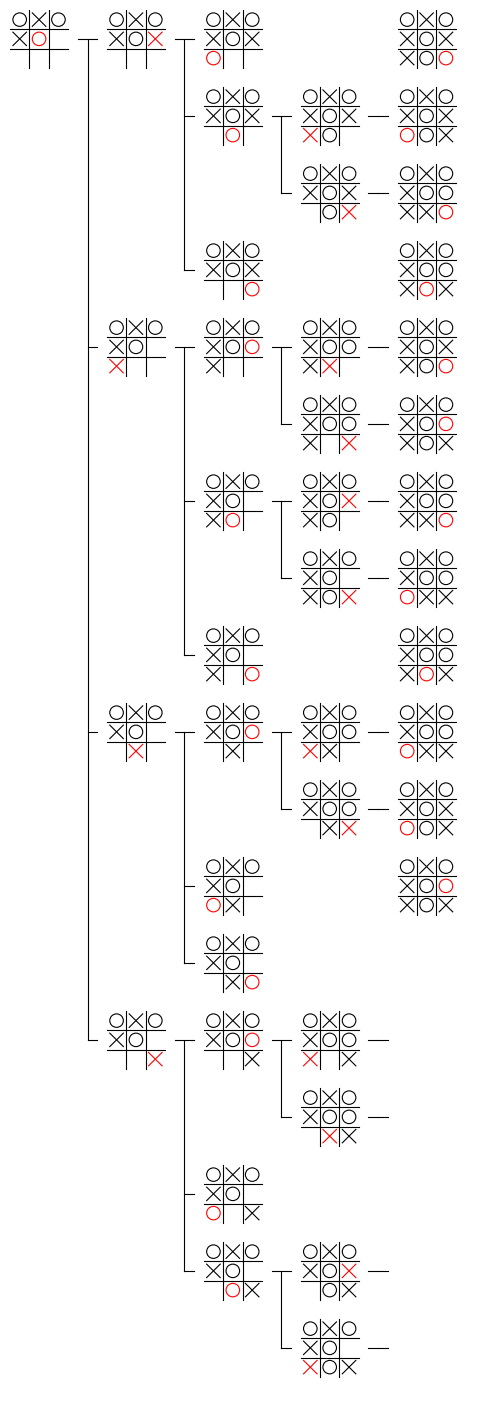

In [27]:
mbtree.draw_tree(mbtree.nodelist_by_depth[5][0], maxdepth=9)

In [28]:
def draw_tree(self, startnode=None, size=0.25, lw=0.8, maxdepth=2):
    if startnode is None:
        startnode = self.root
    self.calc_node_height(maxdepth)
    width = 5 * (maxdepth - startnode.depth + 1)
    height = startnode.height
    fig, ax = plt.subplots(figsize=(width * size, height * size))
    ax.set_xlim(0, width)
    ax.set_ylim(0, height)   
    ax.invert_yaxis()
    ax.axis("off")        
    
    nodelist = [startnode]
    depth = startnode.depth
    dx = 0
    while len(nodelist) > 0 and depth <= maxdepth:        
        dy = 0
        childnodelist = []
        for node in nodelist:
            if node is None:
                dy += 4
                childnodelist.append(None)
            else:
                node.draw_node(ax=ax, size=size, lw=lw, dx=dx, dy=dy)
                dy += node.height
                if len(node.children) > 0:  
                    childnodelist += node.children
                else:
                    childnodelist.append(None)
        dx += 5
        depth += 1
        nodelist = childnodelist
        
Mbtree.draw_tree = draw_tree

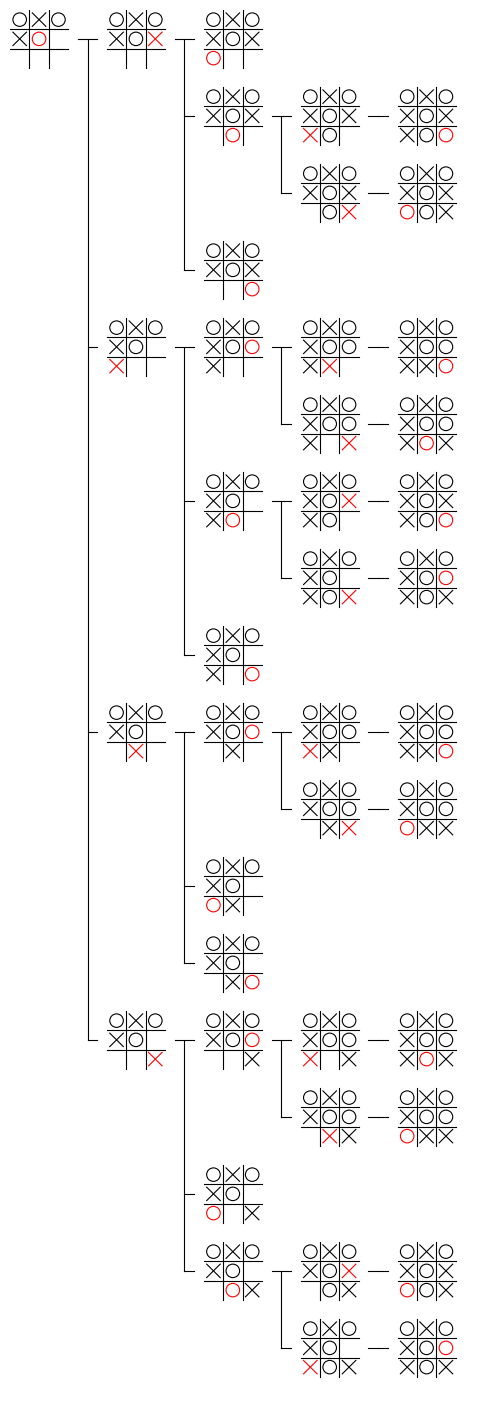

In [29]:
mbtree.draw_tree(mbtree.nodelist_by_depth[5][0], maxdepth=9)

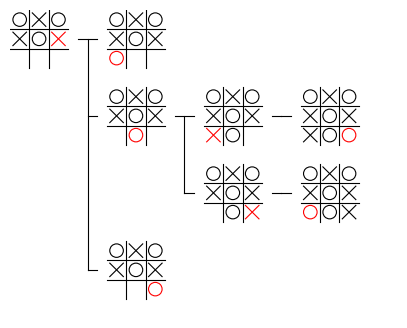

In [30]:
mbtree.draw_tree(mbtree.nodelist_by_depth[6][0], maxdepth=9)